In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


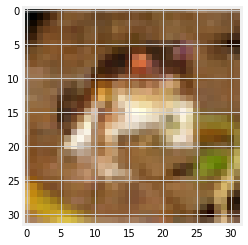

In [4]:
img=plt.imshow(x_train[0])

In [5]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(250,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
hist=model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 2s 10ms/step - loss: 1.8071 - accuracy: 0.3325 - val_loss: 1.4928 - val_accuracy: 0.4666
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 1.4489 - accuracy: 0.4707 - val_loss: 1.3344 - val_accuracy: 0.5177
Epoch 3/10
157/157 [==============================] - 1s 8ms/step - loss: 1.3009 - accuracy: 0.5281 - val_loss: 1.1878 - val_accuracy: 0.5796
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 1.1967 - accuracy: 0.5706 - val_loss: 1.1699 - val_accuracy: 0.5789
Epoch 5/10
157/157 [==============================] - 1s 8ms/step - loss: 1.1148 - accuracy: 0.6007 - val_loss: 1.0871 - val_accuracy: 0.6159
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 1.0513 - accuracy: 0.6277 - val_loss: 1.0507 - val_accuracy: 0.6306
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 1.0000 - accuracy: 0.6443 - val_loss: 1.0112 - val_accuracy: 0.6469
Epoch

In [11]:
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.9552 - accuracy: 0.6631


0.663100004196167

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'uppper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


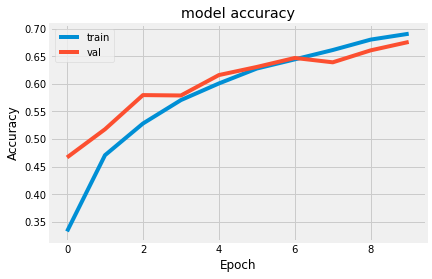

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='uppper right')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'uppper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


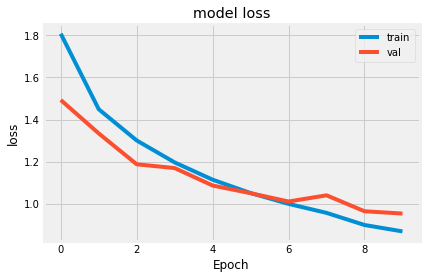

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='uppper right')
plt.show()

In [14]:
#test the model
from google.colab import files
upload=files.upload()

Saving 5KvPB.jpg to 5KvPB (4).jpg


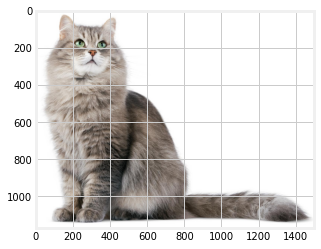

In [15]:
new_image=plt.imread("5KvPB.jpg")
img=plt.imshow(new_image)

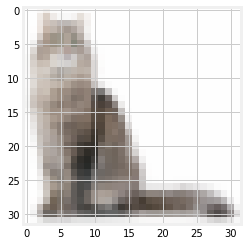

In [16]:
from skimage.transform import resize
resize_image=resize(new_image,(32,32,3))
img=plt.imshow(resize_image)

In [17]:
predictions=model.predict(np.array([resize_image]))
predictions

array([[0.07291884, 0.00675005, 0.21846947, 0.23228401, 0.15001644,
        0.06726676, 0.01026338, 0.08003221, 0.14560565, 0.01639323]],
      dtype=float32)

In [18]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x [0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

print(list_index)      

[3, 2, 4, 8, 7, 0, 5, 9, 6, 1]


In [19]:
for i in range(5):
  print(classification[list_index[i]], ':' ,predictions[0][list_index[i]] * 100,"%")

cat : 23.228400945663452 %
bird : 21.846947073936462 %
deer : 15.00164419412613 %
ship : 14.56056535243988 %
horse : 8.003220707178116 %
